<a href="https://colab.research.google.com/github/pa0lai/DeepLearning/blob/main/Second-hand%20car%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

environment setting

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:


if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

下載資料集 .CSV

In [ ]:
Dataset_File = 'ToyotaUsedCars.csv'
if not os.path.isfile(Dataset_File):
  os.system('wget https://raw.githubusercontent.com/cnchi/datasets/master/' + Dataset_File)

# dataset = pd.read_csv("ToyotaUsedCars.csv")

資料集載入

In [ ]:
import HappyML.preprocessor as pp
dataset = pp.dataset(file=Dataset_File)

切分自變數X與應變數Y

In [ ]:
X, Y = pp.decomposition(dataset=dataset, x_columns=[i for i in range(8)], y_columns=[8])

類別資料數位化

In [ ]:
X = pp.onehot_encoder(X, columns=[0, 2, 4], remove_trap=True)

切分訓練集、測試集

In [ ]:
X_train,X_test, Y_train, Y_test = pp.split_train_test(X, Y, train_size = 0.8)

特徵縮放

In [ ]:
X_train, X_test = pp.feature_scaling(fit_ary = X_train, transform_arys=(X_train,X_test))

建構神經網路各層級

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Add Layers with .add() function
model = Sequential()

# Using Formula #2, Instance=20640, alpha=5
model.add(Dense(input_dim=X_train.shape[1], units=459, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=9, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=1, kernel_initializer="glorot_normal", activation="linear"))

神經網路編譯

In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

模型訓練

In [ ]:
epochs_metrics = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=5, epochs=30)

Epoch 1/30
863/863 [==============================] - 10s 5ms/step - loss: 139828496.0000 - mse: 139828496.0000 - val_loss: 40601528.0000 - val_mse: 40601528.0000
Epoch 2/30
863/863 [==============================] - 3s 4ms/step - loss: 14817432.0000 - mse: 14817432.0000 - val_loss: 10897649.0000 - val_mse: 10897649.0000
Epoch 3/30
863/863 [==============================] - 3s 4ms/step - loss: 7417908.0000 - mse: 7417908.0000 - val_loss: 7571641.0000 - val_mse: 7571641.0000
Epoch 4/30
863/863 [==============================] - 4s 4ms/step - loss: 5615219.0000 - mse: 5615219.0000 - val_loss: 6107226.0000 - val_mse: 6107226.0000
Epoch 5/30
863/863 [==============================] - 4s 4ms/step - loss: 4760851.0000 - mse: 4760851.0000 - val_loss: 5361811.5000 - val_mse: 5361811.5000
Epoch 6/30
863/863 [==============================] - 3s 4ms/step - loss: 4283957.5000 - mse: 4283957.0000 - val_loss: 4811749.0000 - val_mse: 4811749.0000
Epoch 7/30
863/863 [==============================] -

模型校正

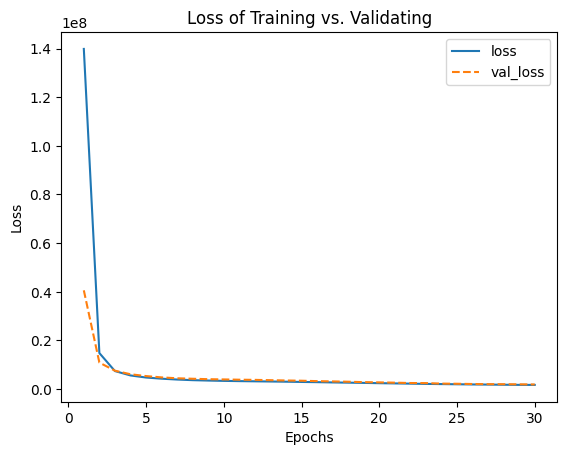

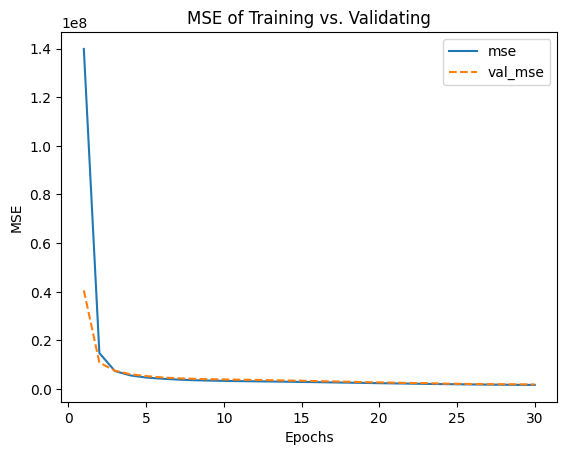

In [ ]:
import HappyML.model_drawer as md

md.epochs_metrics_plot(epochs_metrics.history, keys=("loss", "val_loss"), title="Loss of Training vs. Validating", xyLabel=("Epochs", "Loss"))
md.epochs_metrics_plot(epochs_metrics.history, keys=("mse", "val_mse"), title="MSE of Training vs. Validating", xyLabel=("Epochs", "MSE"))

模型預測

In [ ]:
# Predict
import pandas as pd
Y_pred = pd.DataFrame(model.predict(x=X_test), index=Y_test.index, columns=Y_test.columns)

# Show the Predict Result
df = pd.concat([Y_test, Y_pred], axis=1)
print(df)

43/43 [==============================] - 0s 3ms/step
      price         price
502   18490  19324.494141
5240   7800   7567.958008
4024   9990   9857.704102
1889  10995  10107.431641
6343  11298  11268.242188
...     ...           ...
6106  23500  26265.332031
2902  13795  15448.910156
4589  12000   9947.314453
2780   8990   7347.504395
3330  14995  13673.347656

[1348 rows x 2 columns]


模型評估

In [ ]:
test_loss, test_mse = model.evaluate(X_test, Y_test)
print("Loss of Testing Set:", test_loss)
print("MSE of Testing Set:", test_mse)

43/43 [==============================] - 0s 2ms/step - loss: 1578500.2500 - mse: 1578500.2500
Loss of Testing Set: 1578500.25
MSE of Testing Set: 1578500.25
